# Clustering

Vamos a realizar operaciones de **clustering** (segmentación) de datos.
La idea es encontrar alguna estructura dentro de un dataset que no conocemos.
No se tiene un objetivo de predicción (se trata **aprendizaje no supervisado**), sino de uno de entendimiento de los datos a través del particionamiento del dataset en grupos de instancias.

# Parte 1. K-Means con datos sintéticos

Para poder entender como se utilizan los algoritmos de clustering, vamos inicialmente a crear un dataset sintético, es decir con datos creados artificialmente, que nos permita ilustrar los aspectos de llamado a los métodos de python.

Vamos a generar y visualizar en una gráfica 300 puntos aleatorios distribuidos alrededor de 4 centros en un espacio bidimensional y con una desviación estándar de 0.7. 

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import math
from collections import Counter


from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix, accuracy_score, silhouette_samples, silhouette_score, calinski_harabasz_score
from sklearn import preprocessing
from sklearn.decomposition import PCA

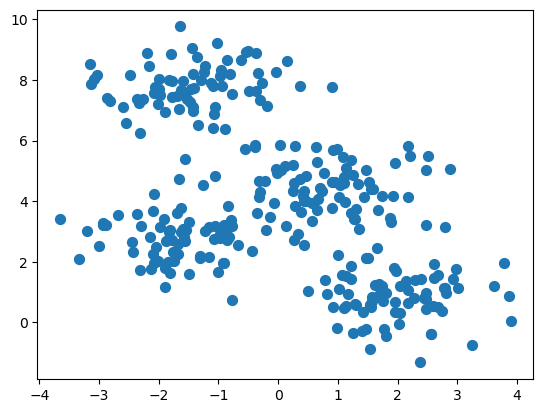

In [3]:
from sklearn.datasets import make_blobs
X, grupo = make_blobs(n_samples=300, centers=4, cluster_std=0.8, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=50);

En X van a quedar las coordenadas de los puntos y en **grupo** los clusters originales a los que pertencen los datos.

In [4]:
X[0:5]

array([[ 0.43071995,  2.54925795],
       [-1.4687922 ,  7.26767764],
       [ 1.21486062,  5.36489604],
       [-0.94206983,  7.80806619],
       [ 1.01004604,  2.2241682 ]])

In [5]:
grupo[0:5]

array([1, 3, 0, 3, 1])

El algoritmo de **K-Means** recibe como parámetro el número de clusters que se buscan (este es un parámetro que no lo determina automáticamente). Como sabemos que los datos sintéticos se crearon con 4 grupos, vamos a analizar si **K-Means** los logra detectar.

In [6]:
kmeans = KMeans(n_clusters=4, random_state=0)
kmeans.fit(X)
grupo_kmeans = kmeans.predict(X)

C:\Users\CARLOS\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\CARLOS\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


Vamos a graficar los clusters encontrados con diferentes colores.

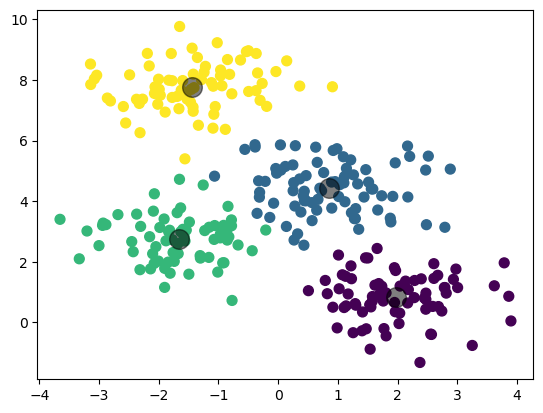

In [7]:
plt.scatter(X[:, 0], X[:, 1], c=grupo_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

Ahora comparemos los grupos encontrados con los reales, utilizando una matriz de confusión.

array([[ 0, 75,  0,  0],
       [74,  1,  0,  0],
       [ 0,  3, 72,  0],
       [ 0,  2,  0, 73]], dtype=int64)

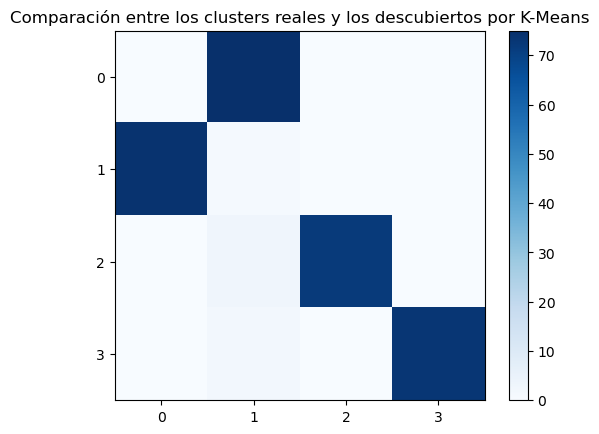

In [8]:
cm = confusion_matrix(grupo, grupo_kmeans)
plt.imshow(cm, cmap=plt.cm.Blues)
plt.title("Comparación entre los clusters reales y los descubiertos por K-Means")
plt.colorbar()
tick_marks = np.arange(4)
plt.xticks(tick_marks, ['0','1','2','3'])
plt.yticks(tick_marks, ['0','1','2','3'])
cm

En las filas encontramos los grupos reales y en las columnas los de K-Means. Encontramos 6 errores, todos asociados por k-means al grupo 0 cuando eran de alguno de los otros 3 grupos.

Hay que tener en cuenta que el orden de los nombres de los grupos generados puede no conincidir con el orden de los grupos encontrados por K-Means, como es el caso aquí.

Lo que vemos es que parece haber una concordancia entre los clusters encontrados por K-Means y los reales: los grupos 0, 1, 2 y 3 de k-means corresponden a los grupos 1, 0, 2, y 3 encontrados por K-Means, respectivamente.

Vamos a cambiar el orden de los clusters de k-means para poder entender mejor los resultados

In [9]:
traducir = [1, 0, 2, 3]

grupo_kmeans_reorg = []
for g_k, g in zip(grupo_kmeans, grupo):
    grupo_kmeans_reorg.append(traducir[g_k])
print(grupo_kmeans_reorg)

[0, 3, 0, 3, 1, 1, 2, 0, 3, 3, 2, 3, 0, 3, 1, 0, 0, 1, 2, 2, 1, 1, 0, 2, 2, 0, 1, 0, 2, 0, 3, 3, 0, 3, 3, 3, 3, 3, 2, 1, 0, 2, 0, 0, 2, 2, 3, 2, 3, 1, 2, 1, 3, 1, 1, 2, 3, 2, 3, 1, 3, 0, 3, 2, 2, 2, 3, 1, 3, 2, 0, 0, 3, 2, 2, 3, 2, 0, 1, 3, 1, 0, 1, 1, 3, 0, 1, 0, 3, 3, 0, 1, 3, 2, 2, 0, 1, 1, 0, 2, 3, 1, 3, 1, 0, 1, 1, 0, 3, 0, 2, 2, 1, 3, 1, 0, 3, 1, 1, 0, 2, 1, 2, 1, 1, 1, 1, 2, 1, 2, 3, 2, 2, 1, 3, 2, 2, 3, 0, 3, 3, 2, 0, 2, 0, 2, 3, 0, 3, 3, 3, 0, 0, 0, 1, 2, 3, 2, 1, 0, 3, 0, 0, 1, 0, 2, 2, 0, 1, 0, 0, 3, 1, 0, 2, 3, 1, 1, 0, 2, 1, 0, 2, 2, 0, 0, 0, 0, 1, 3, 0, 2, 0, 0, 2, 2, 2, 0, 2, 3, 0, 2, 1, 2, 0, 3, 2, 3, 0, 3, 0, 2, 0, 0, 3, 2, 2, 1, 1, 0, 3, 1, 1, 2, 1, 2, 0, 3, 3, 0, 0, 3, 0, 1, 2, 0, 1, 2, 3, 2, 1, 0, 1, 3, 3, 3, 3, 2, 2, 0, 0, 2, 1, 0, 2, 2, 0, 1, 1, 3, 0, 0, 2, 1, 3, 2, 0, 3, 0, 1, 1, 2, 2, 0, 1, 1, 1, 0, 3, 3, 1, 1, 0, 1, 1, 1, 3, 0, 3, 0, 1, 1, 3, 3, 3, 1, 1, 0, 3, 2]


Podemos hacer esto de una manera mas breve utilizando la funcionalidad de Python: List comprehensions, que permite resumir operaciones simples realizadas dentro de un ciclo:

In [10]:
grupo_kmeans_reorg = [traducir[g_k] for g_k in grupo_kmeans]
print(grupo_kmeans_reorg)

[0, 3, 0, 3, 1, 1, 2, 0, 3, 3, 2, 3, 0, 3, 1, 0, 0, 1, 2, 2, 1, 1, 0, 2, 2, 0, 1, 0, 2, 0, 3, 3, 0, 3, 3, 3, 3, 3, 2, 1, 0, 2, 0, 0, 2, 2, 3, 2, 3, 1, 2, 1, 3, 1, 1, 2, 3, 2, 3, 1, 3, 0, 3, 2, 2, 2, 3, 1, 3, 2, 0, 0, 3, 2, 2, 3, 2, 0, 1, 3, 1, 0, 1, 1, 3, 0, 1, 0, 3, 3, 0, 1, 3, 2, 2, 0, 1, 1, 0, 2, 3, 1, 3, 1, 0, 1, 1, 0, 3, 0, 2, 2, 1, 3, 1, 0, 3, 1, 1, 0, 2, 1, 2, 1, 1, 1, 1, 2, 1, 2, 3, 2, 2, 1, 3, 2, 2, 3, 0, 3, 3, 2, 0, 2, 0, 2, 3, 0, 3, 3, 3, 0, 0, 0, 1, 2, 3, 2, 1, 0, 3, 0, 0, 1, 0, 2, 2, 0, 1, 0, 0, 3, 1, 0, 2, 3, 1, 1, 0, 2, 1, 0, 2, 2, 0, 0, 0, 0, 1, 3, 0, 2, 0, 0, 2, 2, 2, 0, 2, 3, 0, 2, 1, 2, 0, 3, 2, 3, 0, 3, 0, 2, 0, 0, 3, 2, 2, 1, 1, 0, 3, 1, 1, 2, 1, 2, 0, 3, 3, 0, 0, 3, 0, 1, 2, 0, 1, 2, 3, 2, 1, 0, 1, 3, 3, 3, 3, 2, 2, 0, 0, 2, 1, 0, 2, 2, 0, 1, 1, 3, 0, 0, 2, 1, 3, 2, 0, 3, 0, 1, 1, 2, 2, 0, 1, 1, 1, 0, 3, 3, 1, 1, 0, 1, 1, 1, 3, 0, 3, 0, 1, 1, 3, 3, 3, 1, 1, 0, 3, 2]


In [11]:
cm = confusion_matrix(grupo, grupo_kmeans_reorg)
cm

array([[75,  0,  0,  0],
       [ 1, 74,  0,  0],
       [ 3,  0, 72,  0],
       [ 2,  0,  0, 73]], dtype=int64)

In [12]:
accuracy_score(grupo, grupo_kmeans_reorg)

0.98

Veamos gráficamente cuáles son los registros que se asocian a un grupo diferente a su original.

In [13]:
diferentes = []
for (x0, x1), g, gk in zip(X, grupo, grupo_kmeans_reorg):
    if g!=gk:
        diferentes.append([x0, x1])
        

In [14]:
X[0:5]

array([[ 0.43071995,  2.54925795],
       [-1.4687922 ,  7.26767764],
       [ 1.21486062,  5.36489604],
       [-0.94206983,  7.80806619],
       [ 1.01004604,  2.2241682 ]])

In [15]:
diferentes = np.array(diferentes)

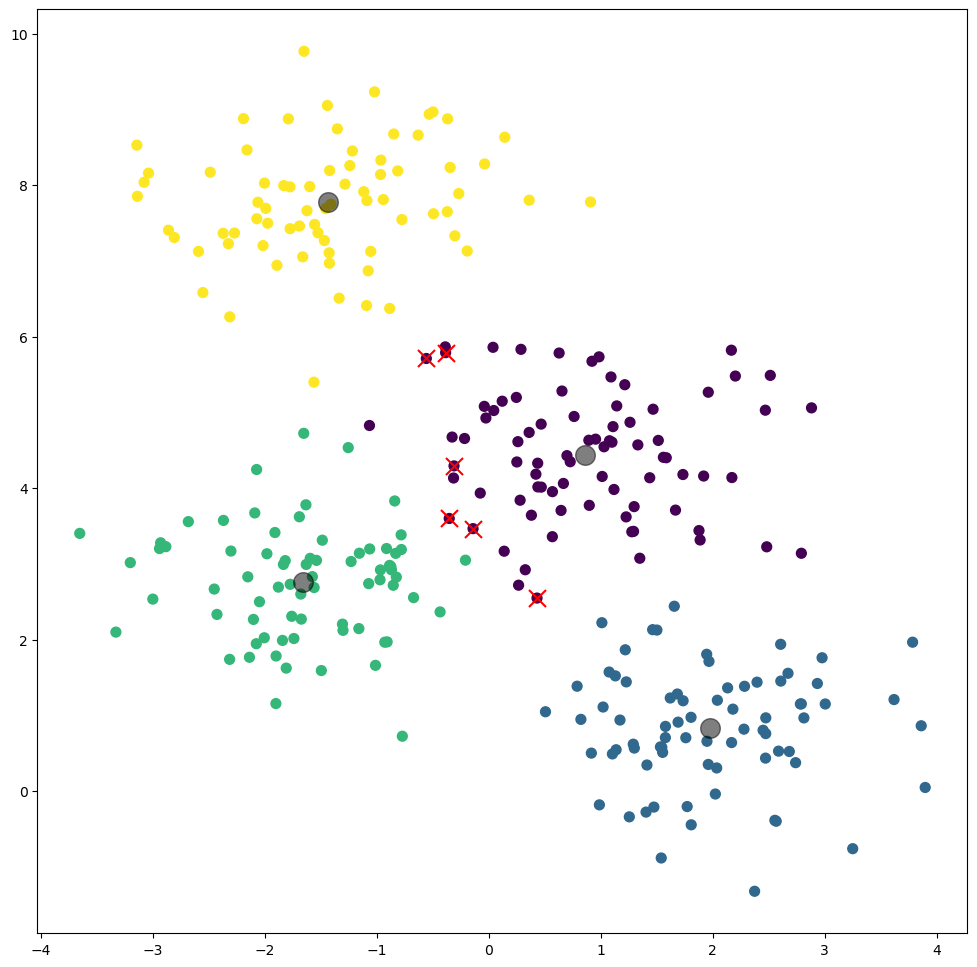

In [16]:
plt.figure(figsize=(12,12))
plt.scatter(X[:, 0], X[:, 1], c=grupo_kmeans_reorg, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

plt.scatter(diferentes[:, 0], diferentes[:, 1], c='red', marker="x", s=150)

**Preguntas**:
Comparamos los grupos creados por el clustering con los originales (esto se llama "clasificación no supervisada")
1. Expliquen la primera matriz de confusión obtenida y el por qué fue necesario recodificar los segmentos obtenidos por el clustering.
2. ¿Qué tan bien puede K-Means encontrar las categorías originales en terminos de accuracy?
3. ¿Tiene sentido crear un test set para un algoritmo de clustering?

# Parte 2. K-Means con datos reales

In [17]:
data = pd.read_csv('09-03-ComprasClientes.csv', na_values=".")
print(data.shape)
data.head(5)

(440, 8)


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [18]:
data.describe(include="all")

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


## Preparación de los datos

**¿Qué problemas saltan a la vista al inspeccionar los datos?**

1. Las variables Channel y Region tienen tipo int64, cuando en realidad codifican categorías de canales y de regiones. Es necesario cambiar sus tipos.
1. Tenemos en todas las variables de consumo valores anormalmente grandes que pueden considerarse excepciones en el mejor de los casos (anomalías o errores de captura en el peor de los casos). Hay que identificar los registros en cuestión y evaluar la posibilidad de descartarlos pues pueden influenciar negativamente muchos de los modelos que se pueden aprender a partir de los datos.
1. Las escalas de las variables que denotan los montos consumidos de cada tipo de productos son muy disparejas. Es necesario normalizar los datos ya que de no hacerlo se otorgaría una importancia demasiado desmedida a variables como Fresh casi que ignorando variables como Delicatessen.

Arreglamos primero los tipos de datos incorrectos:

In [20]:
data.Channel = data.Channel.astype(str)
data.Region = data.Region.astype(str)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Channel           440 non-null    object
 1   Region            440 non-null    object
 2   Fresh             440 non-null    int64 
 3   Milk              440 non-null    int64 
 4   Grocery           440 non-null    int64 
 5   Frozen            440 non-null    int64 
 6   Detergents_Paper  440 non-null    int64 
 7   Delicassen        440 non-null    int64 
dtypes: int64(6), object(2)
memory usage: 27.6+ KB


Antes de normalizar es necesario limpiar las excepciones o anomalías con valores o muy grandes o muy pequeñas. Vamos a analizar las variables numéricas a partir de diagramas de cajas y bigotes.

<Axes: >

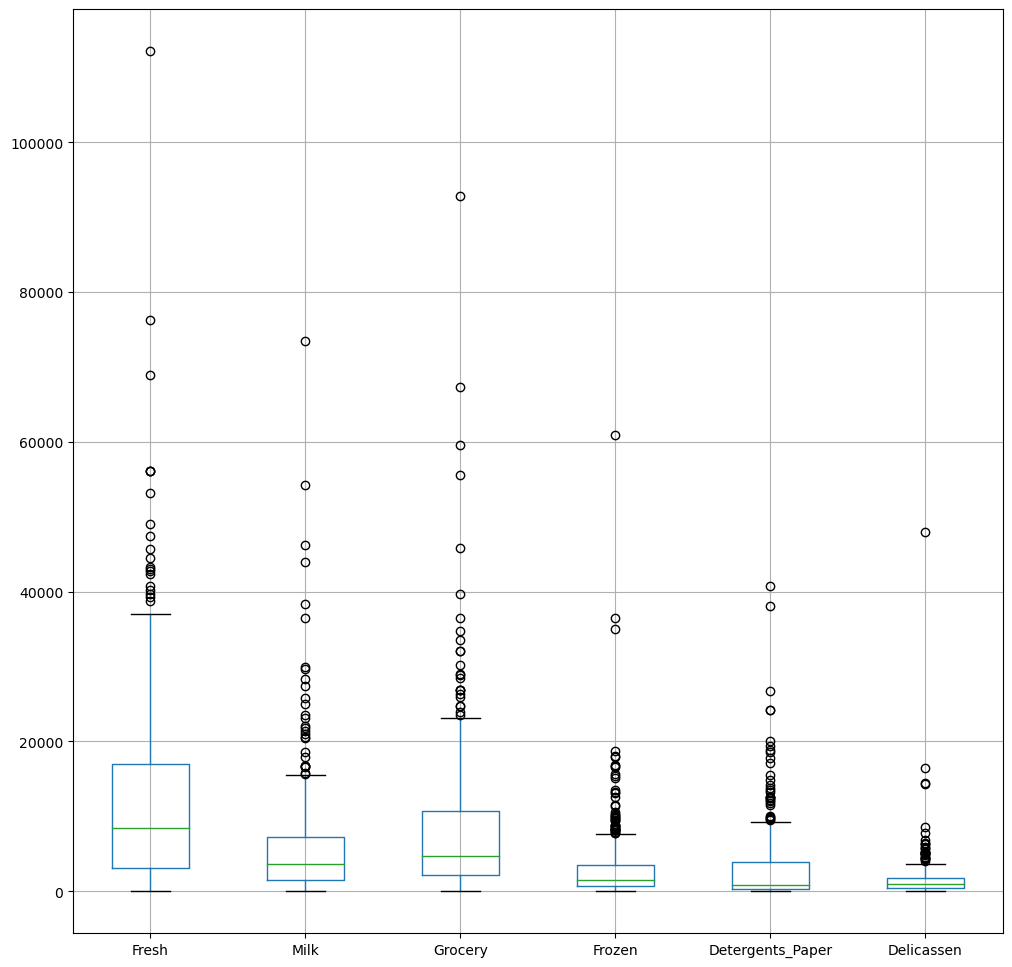

In [21]:
plt.figure(figsize=(12,12))
data.boxplot()

Vemos que hay valores muy importantes en todas las variables. Si contamos los puntos individuales más elevados podemos identificar 6 o menos puntos que sobrepasan la mayoría de los demás.
Puede que algunos de los puntos excepcionales en las diferentes variables correspondan a los mismos individuos. Vamos a identificar los top 6 de valores mas importantes en cada tipo de producto y no los vamos a considerar en los análisis siguientes.

In [22]:
temp = data.sort_values(['Fresh'], ascending=False)
print("Excepciones de Fresh: ", np.sort(temp[0:6].index))
indicesAQuitar = temp[0:6].index

temp = data.sort_values(['Milk'], ascending=False)
print("Excepciones de Milk: ", np.sort(temp[0:6].index))
indicesAQuitar = np.union1d(indicesAQuitar, temp[0:6].index)

temp = data.sort_values(['Grocery'], ascending=False)
print("Excepciones de Grocery: ", np.sort(temp[0:6].index))
indicesAQuitar = np.union1d(indicesAQuitar, temp[0:6].index)

temp = data.sort_values(['Frozen'], ascending=False)
print("Excepciones de Frozen: ", np.sort(temp[0:6].index))
indicesAQuitar = np.union1d(indicesAQuitar, temp[0:6].index)

temp = data.sort_values(['Detergents_Paper'], ascending=False)
print("Excepciones de Detergents_Paper: ", np.sort(temp[0:6].index))
indicesAQuitar = np.union1d(indicesAQuitar, temp[0:6].index)

temp = data.sort_values(['Delicassen'], ascending=False)
print("Excepciones de Delicassen: ", np.sort(temp[0:6].index))
indicesAQuitar = np.union1d(indicesAQuitar, temp[0:6].index)

indicesAQuitar

Excepciones de Fresh:  [ 39 103 125 181 258 284]
Excepciones de Milk:  [ 23  47  61  85  86 183]
Excepciones de Grocery:  [ 47  61  65  85 211 333]
Excepciones de Frozen:  [ 93 103 183 196 325 413]
Excepciones de Detergents_Paper:  [ 47  61  65  85  86 333]
Excepciones de Delicassen:  [  2  23  71  87 181 183]


array([  2,  23,  39,  47,  61,  65,  71,  85,  86,  87,  93, 103, 125,
       181, 183, 196, 211, 258, 284, 325, 333, 413], dtype=int64)

Tenemos 22 registros identificados como excepciones. Vemos que algunos tienen valores excepcionales según diferentes tipos de consumo (23, 47, 61, 65, 85, ...)

In [23]:
data.shape

(440, 8)

In [27]:
dataDepurado = data.loc[~data.index.isin(indicesAQuitar)]
dataDepurado.shape

(418, 8)

Vamos ahora a normalizar los datos para que todas las variables tengan la misma importancia. Solo vamos a considerar los datos numéricos, por lo que no incluimos las variables Channel y Region.

In [28]:
dataStd = pd.DataFrame(preprocessing.scale(dataDepurado.iloc[:,2:]))
dataStd.columns=dataDepurado.columns[2:]

In [29]:
dataStd.mean(axis=0)

Fresh              -8.499315e-18
Milk                0.000000e+00
Grocery             8.499315e-18
Frozen             -4.249658e-17
Detergents_Paper    4.249658e-17
Delicassen          6.799452e-17
dtype: float64

In [30]:
dataStd.std(axis=0)

Fresh               1.001198
Milk                1.001198
Grocery             1.001198
Frozen              1.001198
Detergents_Paper    1.001198
Delicassen          1.001198
dtype: float64

## Clustering

Con un k de 3, realice un clustering por K-Means (utilicen random_state=0). Agregue una columna "Cluster" con el segmento correspondiente (0, 1, o 2) al dataset.

In [31]:
kmeans = KMeans(n_clusters=3, random_state=0, n_init=10)
kmeans.fit(dataStd.iloc[:,0:6])

C:\Users\CARLOS\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


KMeans(n_clusters=3, n_init=10, random_state=0)

El método K-Means en scikit-learn permite definir los valores de ciertos parámetros que controlan la ejecución del algoritmo de clustering. Nos interesan particularmente:
- **n_clusters**: número de clusters que se desean (el parámetro "K"). Por defecto es 8.
- **init**: el método de inicialización de los centroides. Por defecto es "k-means++". Otros valores son "random" o un array con los centroides iniciales
- **n_init**: número de inicializaciones diferentes a ensayar para evitar llegar a un óptimo local. Por defecto es 10
- **max_iter**: Máximo número de iteraciones que se esparará para llegar a convergencia. Por defecto es 300.
- **tol**: tolerancia para determinar que se ha llegado o no a convergenia con respecto a la reducción del WSS (interia). Por defecto es 0.0001
- **random_state**: semilla de inicialización del generador pseudo-aleatorio para poder reproducir los resultados.

El objeto resultado del KMeans después de lanzado el ajuste del algoritmo consta de diferentes valores de salida:
- **cluster_centers_**: los centroides finales de los clusters.
- **labels_**: los clusters a los cuales termina perteneciendo cada instancia del set de aprendizaje.
- **interia_**: el WSS final.
- **n_iter_**: el número de iteraciones que tomó llegar a convergencia.

In [35]:
print("Le tomó a KMeans", kmeans.n_iter_, "iteraciones llegar a convergencia, con un WSS final de:n",
      kmeans.inertia_, "y los centroides siguientes:", kmeans.cluster_centers_)

Le tomó a KMeans 11 iteraciones llegar a convergencia, con un WSS final de:n 1389.125986554681 y los centroides siguientes: [[-0.54265067  1.30970855  1.56507053 -0.35585007  1.56828129  0.34695352]
 [-0.27589129 -0.41913581 -0.44117296 -0.30271382 -0.38972917 -0.31984657]
 [ 1.21368532 -0.15258411 -0.33507495  1.10757898 -0.46973042  0.49396266]]


In [36]:
kmeans.labels_

array([1, 0, 2, 2, 1, 1, 1, 1, 0, 0, 1, 2, 0, 0, 1, 0, 1, 2, 1, 1, 1, 2,
       2, 1, 1, 1, 0, 2, 2, 1, 1, 2, 1, 1, 2, 0, 0, 2, 2, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 2, 0, 2, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 2, 1, 2, 2,
       2, 1, 2, 1, 0, 1, 1, 1, 0, 0, 1, 1, 2, 2, 1, 2, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 2, 2, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 1,
       0, 1, 1, 1, 2, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 2, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 2,
       1, 1, 0, 1, 2, 1, 1, 1, 0, 0, 2, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 2, 1, 1, 1, 2, 1, 1,
       2, 1, 2, 2, 2, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 2, 2, 2, 2, 1, 1, 2,
       1, 1, 1, 1, 0, 0, 0, 2, 0, 1, 1, 1, 1, 2, 1, 1, 2, 2, 2, 1, 1, 1,
       2, 2, 2, 1, 2, 1, 2, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 2, 2, 0, 1, 1, 0, 1, 1, 1, 0,

También podemos utilizar el objeto kmeans resultante como modelo de clasificación, y a través del método *predict* se le puede enviar un dataset para evaluar y obtener los clusters a los que pertenecen. Por ejemplo, utilicemoslo para clasificar los mismos ejemplos de entrenamiento:

In [37]:
clusters = kmeans.predict(dataStd.iloc[:, 0:6])
clusters

array([1, 0, 2, 2, 1, 1, 1, 1, 0, 0, 1, 2, 0, 0, 1, 0, 1, 2, 1, 1, 1, 2,
       2, 1, 1, 1, 0, 2, 2, 1, 1, 2, 1, 1, 2, 0, 0, 2, 2, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 2, 0, 2, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 2, 1, 2, 2,
       2, 1, 2, 1, 0, 1, 1, 1, 0, 0, 1, 1, 2, 2, 1, 2, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 2, 2, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 1,
       0, 1, 1, 1, 2, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 2, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 2,
       1, 1, 0, 1, 2, 1, 1, 1, 0, 0, 2, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 2, 1, 1, 1, 2, 1, 1,
       2, 1, 2, 2, 2, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 2, 2, 2, 2, 1, 1, 2,
       1, 1, 1, 1, 0, 0, 0, 2, 0, 1, 1, 1, 1, 2, 1, 1, 2, 2, 2, 1, 1, 1,
       2, 2, 2, 1, 2, 1, 2, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 2, 2, 0, 1, 1, 0, 1, 1, 1, 0,

In [38]:
counter=Counter(clusters)
print(counter)

Counter({1: 238, 2: 93, 0: 87})


Tenemos 3 clusters de 238, 93 y 87 instancias cada uno.
Agregamos una columna al dataframe con los datos analizados que indique a que cluster pertenece cada registro.

In [39]:
dataStd.loc[:,'Cluster'] = clusters

In [40]:
dataStd.columns

Index(['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen',
       'Cluster'],
      dtype='object')

In [41]:
dataStd[0:5]

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Cluster
0,0.189650,0.935012,0.073249,-0.805601,0.047187,0.083000,1
1,-0.371959,0.966262,0.364676,-0.273463,0.223754,0.448833,0
2,0.249293,-0.781752,-0.411737,1.322266,-0.570941,0.458856,2
3,1.184974,0.073383,0.020539,0.466650,-0.208678,3.296150,2
4,-0.136187,0.651522,-0.280326,-0.650222,-0.203544,0.177382,1


# Parte 3. Interpretación de los clusters

## Interpretación de los clusters, con k =3

Vamos a tratar de entender cuales son las características de los registros que los componen. Para ello vamos a ver gráficos de densidad que permitan identificar las predilecciones de compras de los clientes que pertenecen a cada cluster.

In [42]:
var_num = ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']

In [43]:
import warnings
warnings.filterwarnings('ignore')

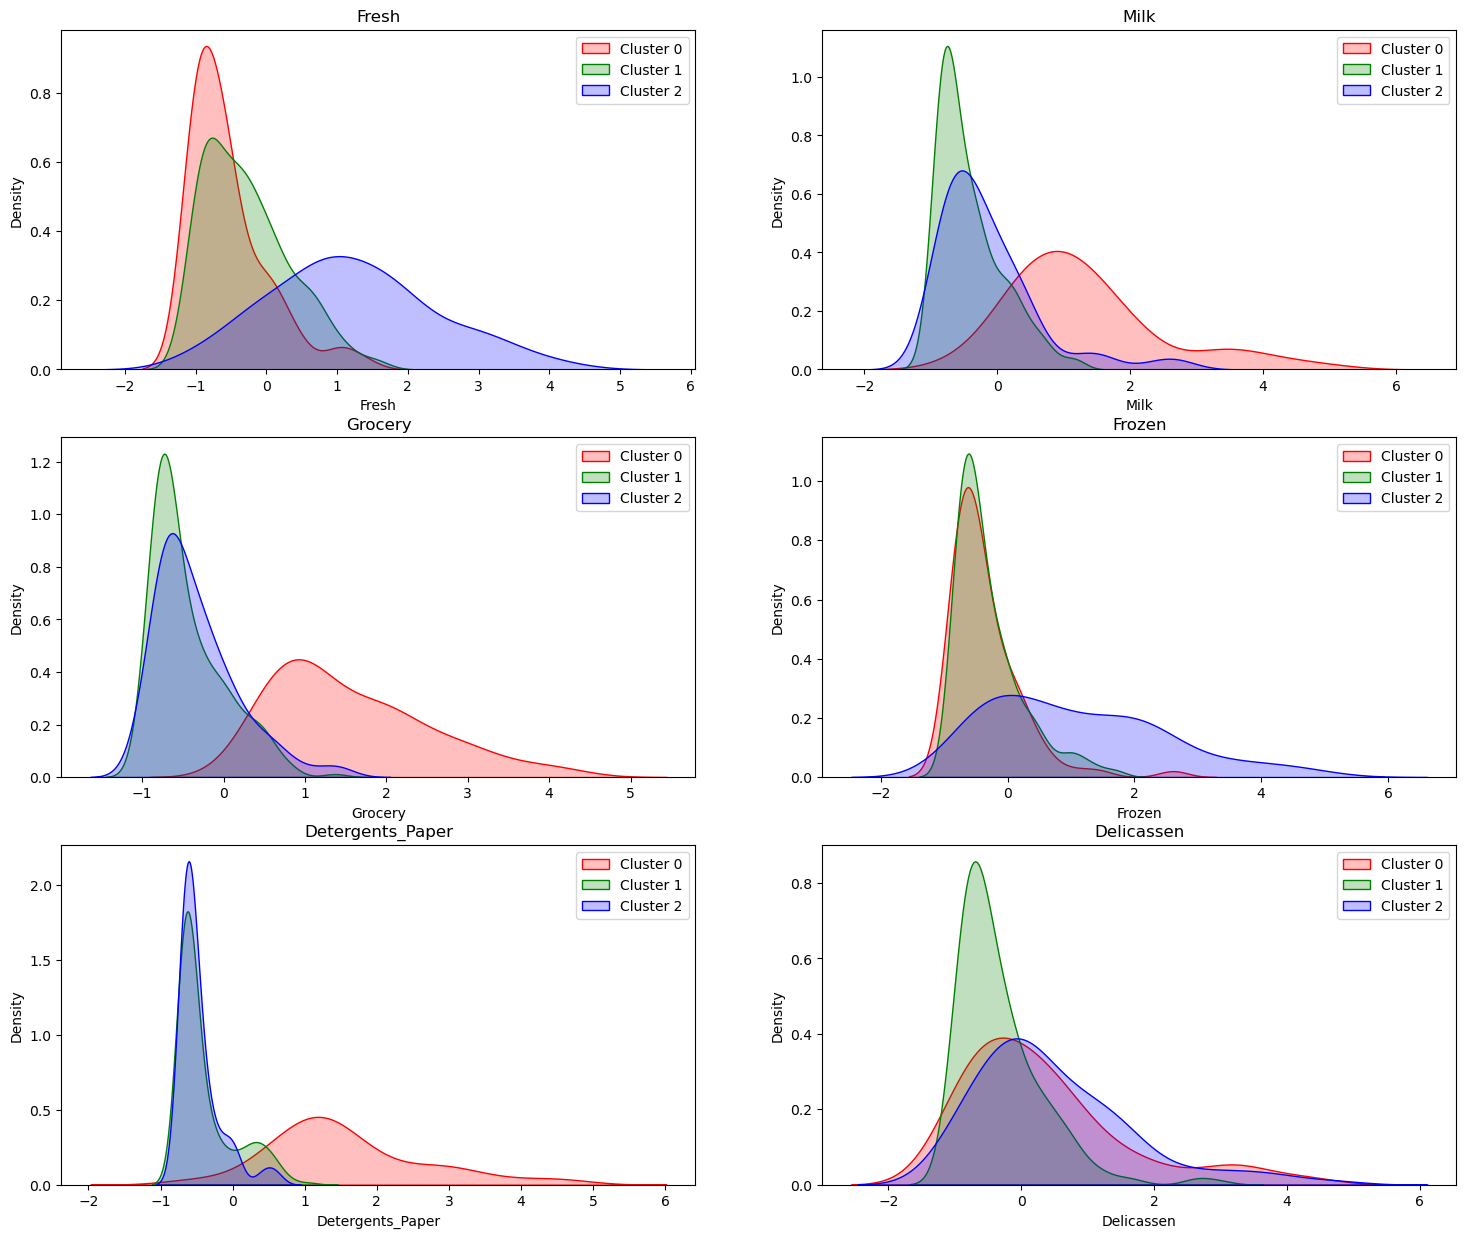

In [44]:
fig = plt.figure(figsize=(18,15))
i=1
for var in var_num:
    ax = fig.add_subplot(math.ceil(len(var_num)/2), 2, i)
    sns.kdeplot(dataStd.loc[dataStd.Cluster==0][var], shade=True, color='r', ax=ax);
    sns.kdeplot(dataStd.loc[dataStd.Cluster==1][var], shade=True, color='g', ax=ax);
    sns.kdeplot(dataStd.loc[dataStd.Cluster==2][var], shade=True, color='b', ax=ax);
    plt.title(var)
    plt.legend(['Cluster 0', 'Cluster 1', 'Cluster 2'])
    i+=1

Veámoslos en scatterplots para entender mejor las diferencias:

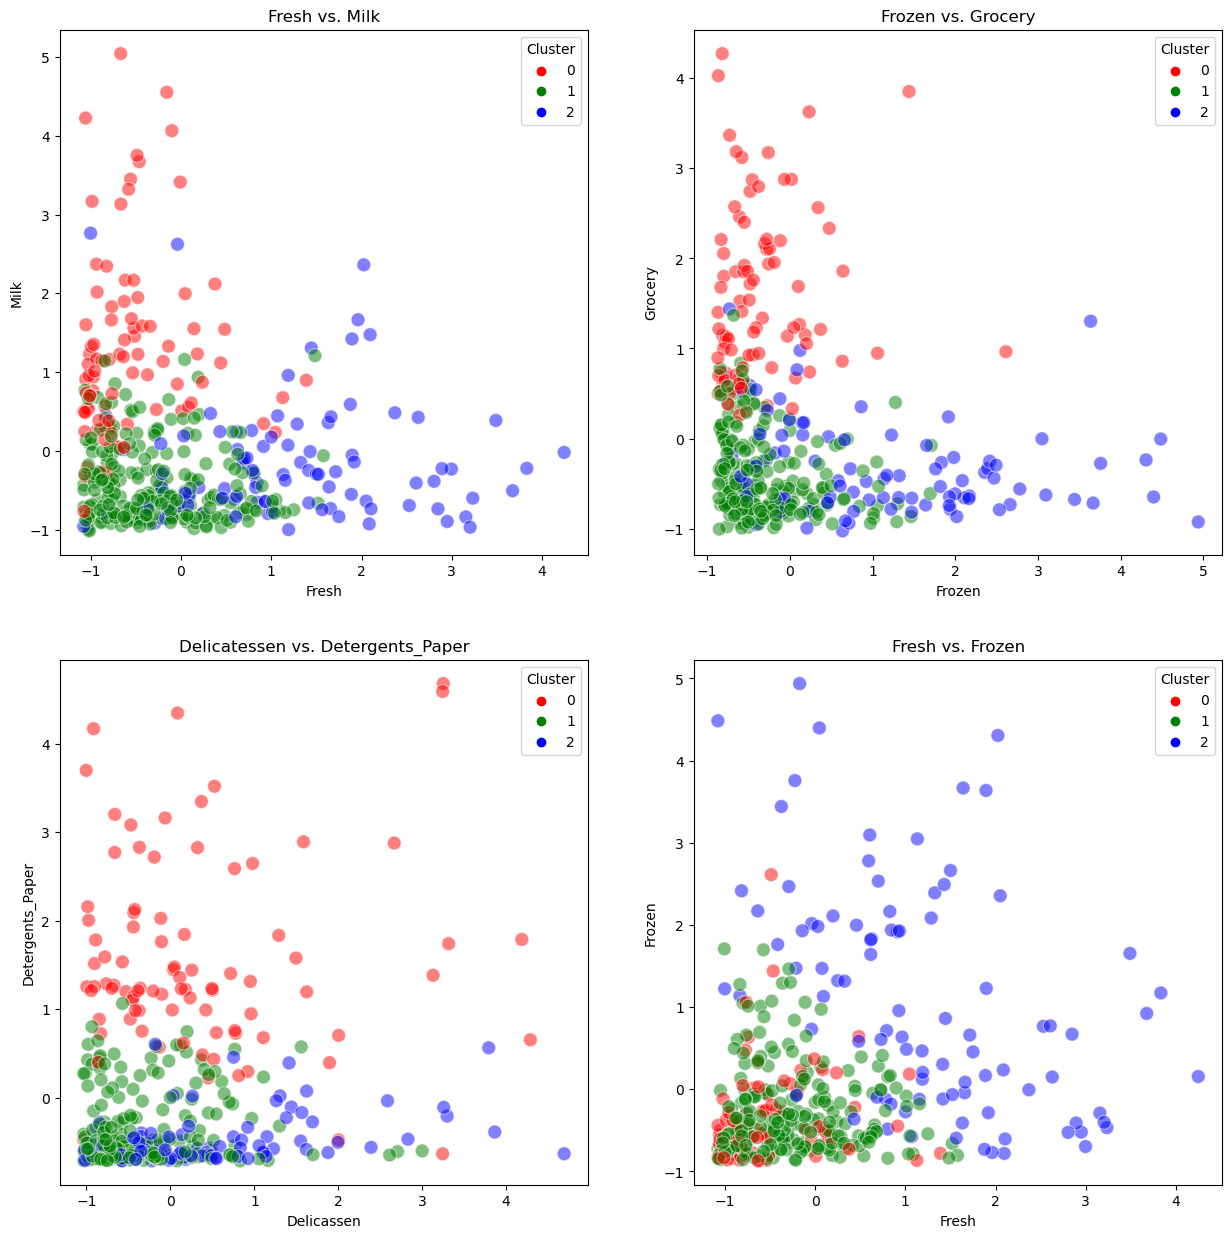

In [46]:
fig = plt.figure(figsize=(15,15))
colorPalette = ["r", "g", "b"]
ax = fig.add_subplot(2, 2, 1)
sns.scatterplot(x="Fresh", y="Milk", hue="Cluster", data=dataStd, ax=ax, palette=colorPalette, s=100, alpha=0.5)
plt.title("Fresh vs. Milk")
ax = fig.add_subplot(2, 2, 2)
sns.scatterplot(x="Frozen", y="Grocery", hue="Cluster", data=dataStd, ax=ax, palette=colorPalette, s=100, alpha=0.5)
plt.title("Frozen vs. Grocery")
ax = fig.add_subplot(2, 2, 3)
sns.scatterplot(x="Delicassen", y="Detergents_Paper", hue="Cluster", data=dataStd, ax=ax, palette=colorPalette, s=100, alpha=0.5)
plt.title("Delicatessen vs. Detergents_Paper")
ax = fig.add_subplot(2, 2, 4)
sns.scatterplot(x="Fresh", y="Frozen", hue="Cluster", data=dataStd, ax=ax, palette=colorPalette, s=100, alpha=0.5)
plt.title("Fresh vs. Frozen")
plt.show()

¿Cómo se puede distinguir entre?:
- los rojos y los demás
- los verdes y los demás
- los azules y los demás

Podemos interpretar entonces los clusters de esta manera:
- Cluster 0 (Rojo, 238 registros). Tiene valores:
    - Altos : Milk, Grocery, Detergents_Paper
    - Medios: Delicassen
    - Bajos : Fresh, Frozen
- Cluster 1 (Verde, 93 registros). Tiene valores:
    - Altos : 
    - Medios: 
    - Bajos : Fresh, Milk, Grocery, Frozen, Detergents_Paper, Delicassen
- Cluster 2 (Azul, 87 registros). Tiene valores:
    - Altos : Fresh, Frozen
    - Medios: Delicassen
    - Bajos : Milk , Grocery, Detergents_Paper
    

**Qué podemos decir de los 3 clusters, qué adjetivo les darían para describirlos?**

## Interpretación de los clusters, con k = 4

Repetimos el análisis con k=4

In [39]:
kmeans = KMeans(n_clusters=4, random_state=0, n_init=10)
kmeans.fit(dataStd.iloc[:, 0:6])
clusters = kmeans.labels_

In [40]:
dataStd['Cluster']= clusters
counter=Counter(clusters)
print(counter)

Counter({1: 221, 0: 84, 2: 66, 3: 47})


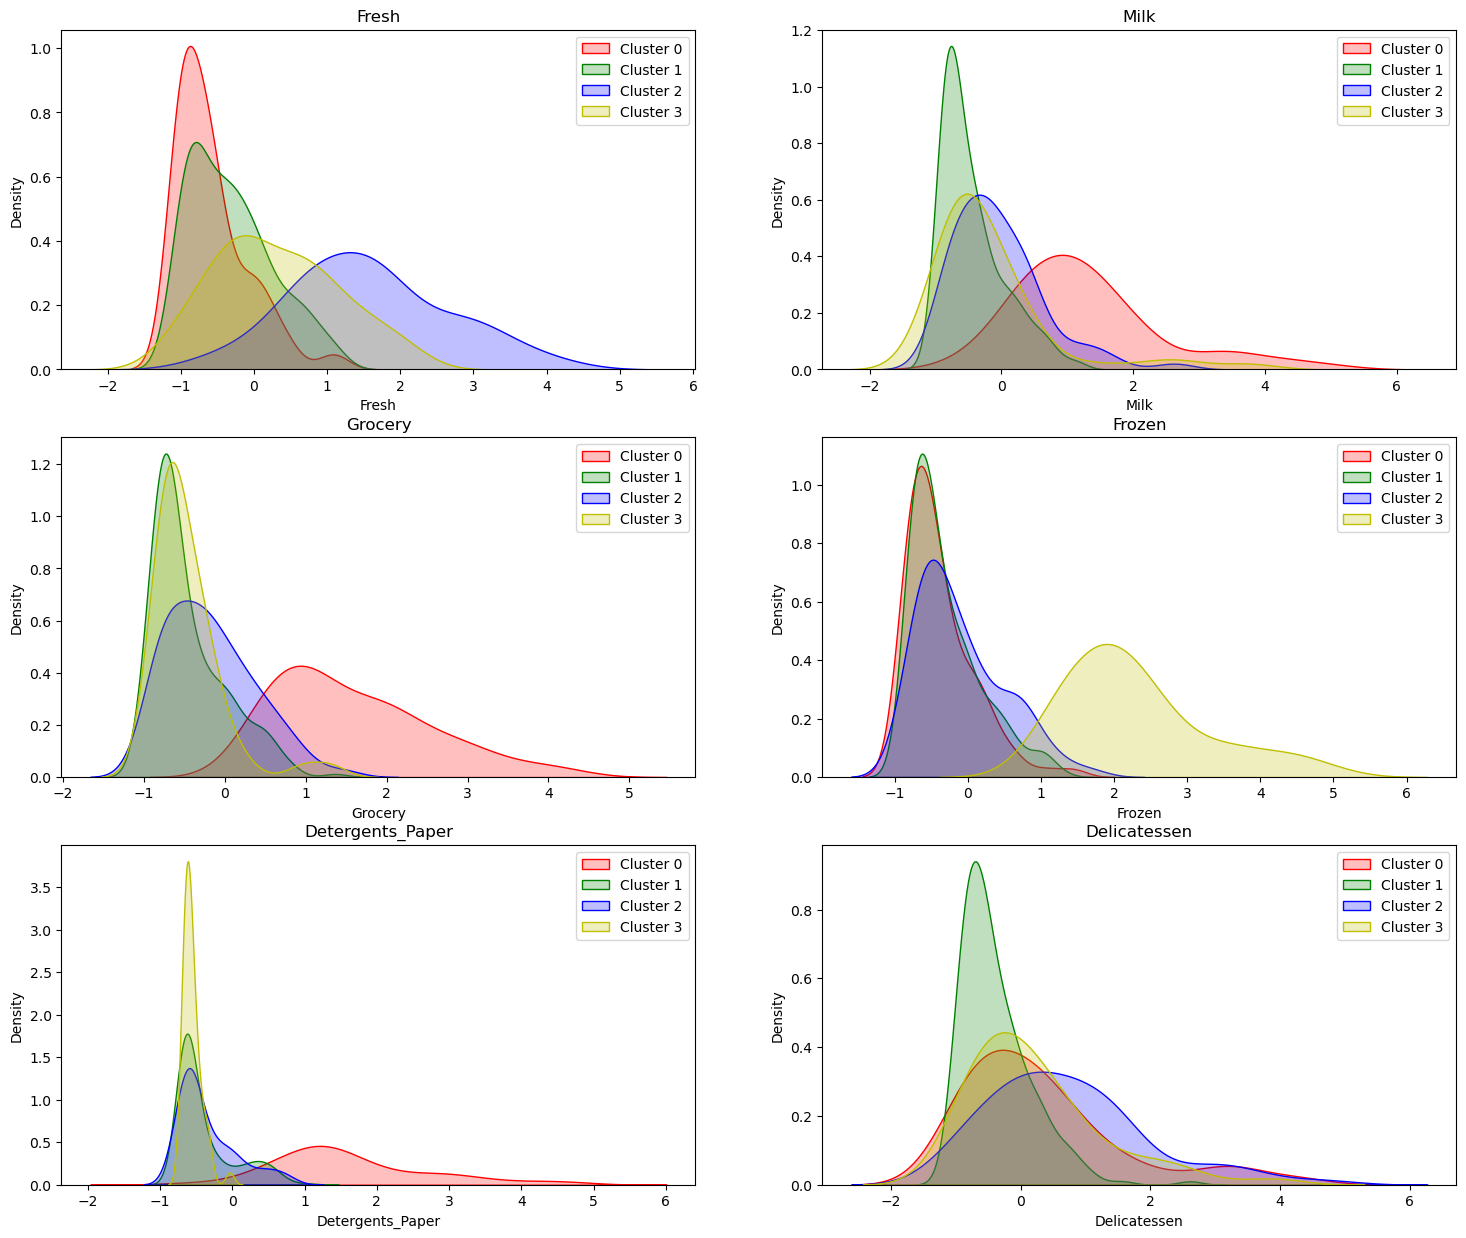

In [41]:
fig = plt.figure(figsize=(18,15))
i=1
for var in var_num:
    ax = fig.add_subplot(math.ceil(len(var_num)/2), 2, i)
    sns.kdeplot(dataStd.loc[dataStd.Cluster==0][var], shade=True, color='r', ax=ax);
    sns.kdeplot(dataStd.loc[dataStd.Cluster==1][var], shade=True, color='g', ax=ax);
    sns.kdeplot(dataStd.loc[dataStd.Cluster==2][var], shade=True, color='b', ax=ax);
    sns.kdeplot(dataStd.loc[dataStd.Cluster==3][var], shade=True, color='y', ax=ax);
    plt.title(var)
    plt.legend(['Cluster 0', 'Cluster 1', 'Cluster 2', 'Cluster 3'])
    i+=1

Veamoslos en scatterplots para entender mejor las diferencias:

Text(0.5, 1.0, 'Fresh vs. Frozen')

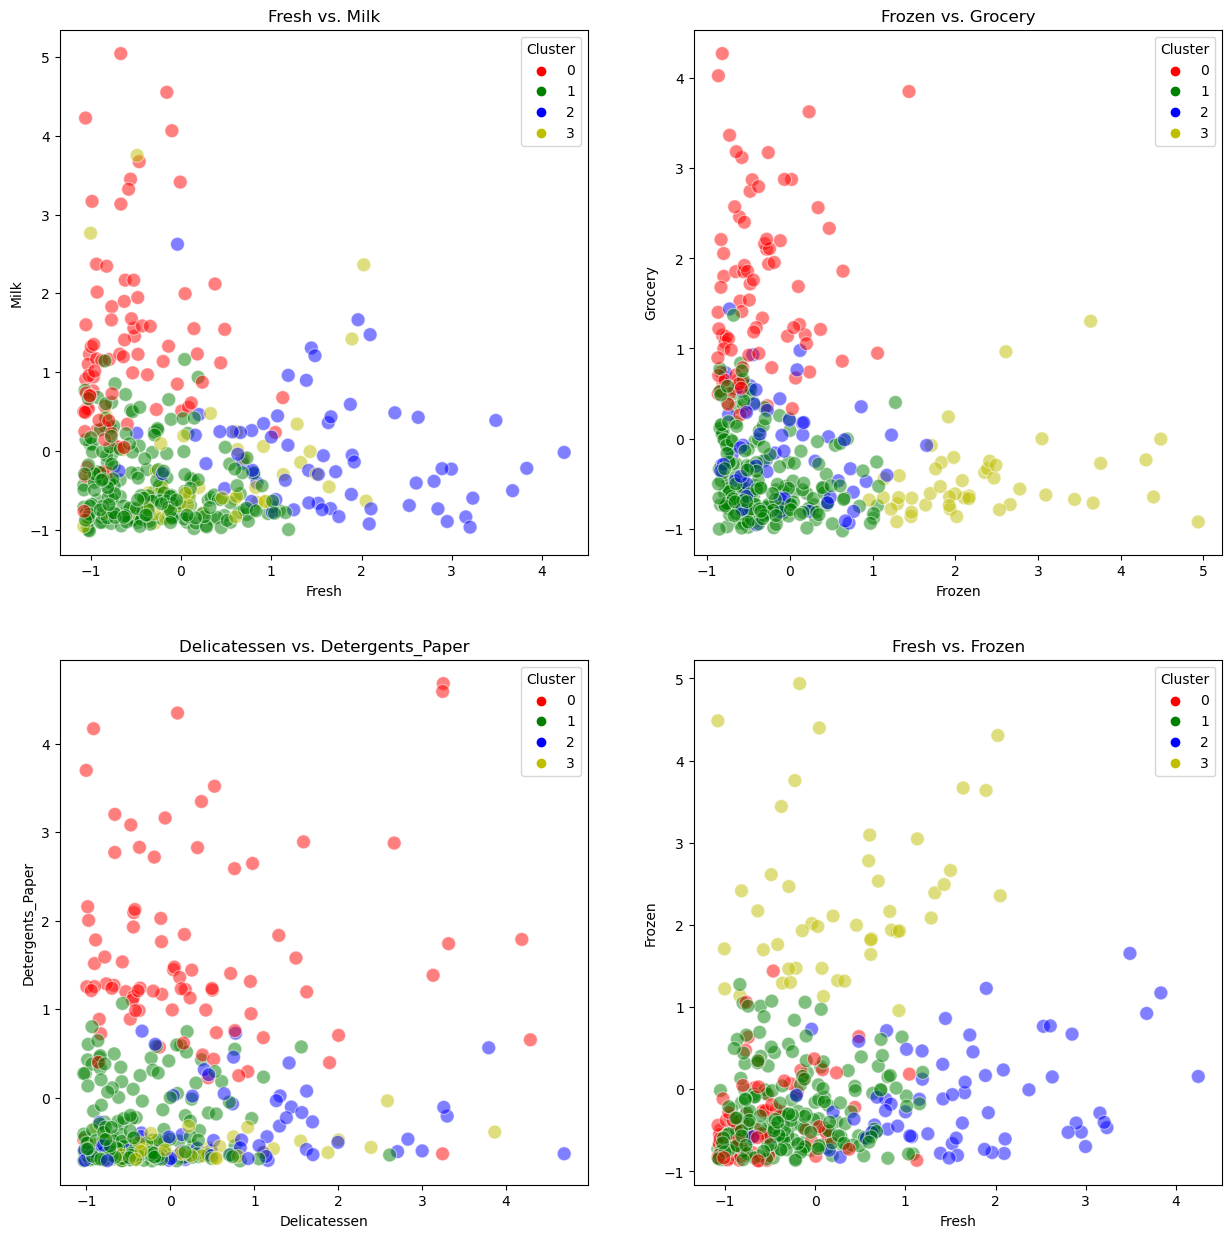

In [42]:
fig = plt.figure(figsize=(15,15))
colorPalette = ["r", "g", "b", "y"]
ax = fig.add_subplot(2, 2, 1)
sns.scatterplot(x="Fresh", y="Milk", hue="Cluster", data=dataStd, ax=ax, palette=colorPalette, s=100, alpha=0.5)
plt.title("Fresh vs. Milk")
ax = fig.add_subplot(2, 2, 2)
sns.scatterplot(x="Frozen", y="Grocery", hue="Cluster", data=dataStd, ax=ax, palette=colorPalette, s=100, alpha=0.5)
plt.title("Frozen vs. Grocery")
ax = fig.add_subplot(2, 2, 3)
sns.scatterplot(x="Delicatessen", y="Detergents_Paper", hue="Cluster", data=dataStd, ax=ax, palette=colorPalette, s=100, alpha=0.5)
plt.title("Delicatessen vs. Detergents_Paper")
ax = fig.add_subplot(2, 2, 4)
sns.scatterplot(x="Fresh", y="Frozen", hue="Cluster", data=dataStd, ax=ax, palette=colorPalette, s=100, alpha=0.5)
plt.title("Fresh vs. Frozen")

¿Cómo se puede distinguir entre?:
- los rojos y los demás
- los verdes y los demás
- los azules y los demás
- los amarillos y los demás

## Interpretación de los clusters, con k =2

Repetimos el análisis con k=2

In [43]:
kmeans = KMeans(n_clusters=2, random_state=0, n_init=10)
kmeans.fit(dataStd.iloc[:, 0:6])
clusters = kmeans.labels_

In [44]:
dataStd['Cluster']= clusters
counter=Counter(clusters)
print(counter)

Counter({0: 318, 1: 100})


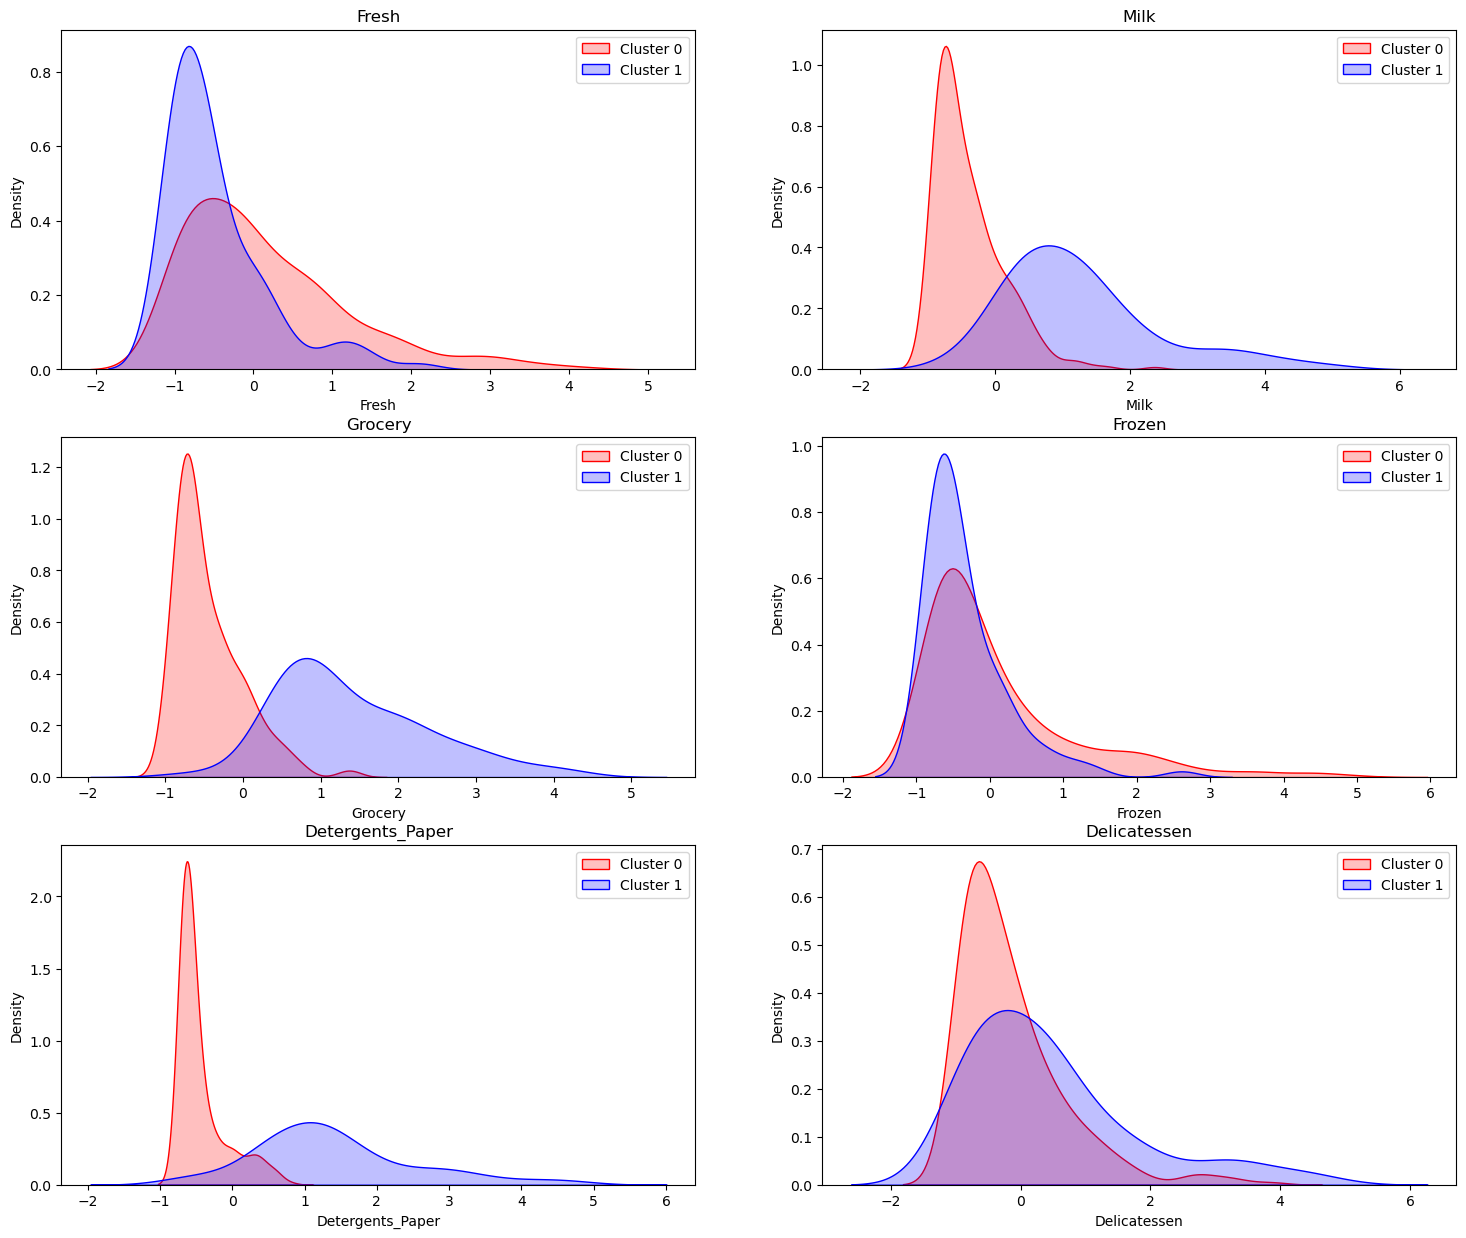

In [45]:
fig = plt.figure(figsize=(18,15))
i=1
for var in var_num:
    ax = fig.add_subplot(math.ceil(len(var_num)/2), 2, i)
    sns.kdeplot(dataStd.loc[dataStd.Cluster==0][var], shade=True, color='r', ax=ax);
    sns.kdeplot(dataStd.loc[dataStd.Cluster==1][var], shade=True, color='b', ax=ax);
    plt.title(var)
    plt.legend(['Cluster 0', 'Cluster 1'])
    i+=1

Vemos que con K=2, las compras en Delicatessen y Frozen no sirven para discriminar entre los 2 grupos.

Veamoslos en scatterplots para entender mejor las diferencias:

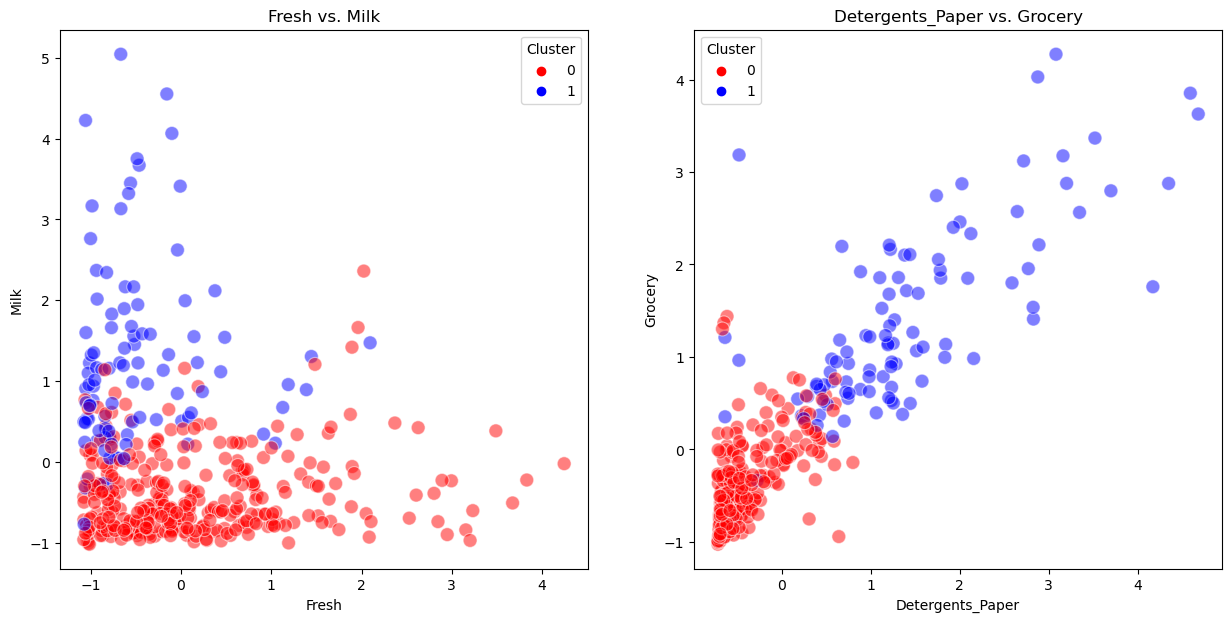

In [46]:
fig = plt.figure(figsize=(15,7))
colorPalette = ["r", "b"]
ax = fig.add_subplot(1, 2, 1)
sns.scatterplot(x="Fresh", y="Milk", hue="Cluster", data=dataStd, ax=ax, palette=colorPalette, s=100, alpha=0.5)
plt.title("Fresh vs. Milk")
ax = fig.add_subplot(1, 2, 2)
sns.scatterplot(x="Detergents_Paper", y="Grocery", hue="Cluster", data=dataStd, ax=ax, palette=colorPalette, s=100, alpha=0.5)
plt.title("Detergents_Paper vs. Grocery")
plt.show()

Vemos que con K=2, las compras en Delicatessen y Frozen no sirven para discriminar entre los 2 grupos.

Podemos interpretar entonces los clusters de esta manera:
- Cluster 0 (Rojo, 330 registros). Tiene valores:
    - Altos : Milk, Grocery, Detergents_Paper
    - Medios: 
    - Bajos : Fresh
- Cluster 1 (Azul, 88 registros). Tiene valores:
    - Altos : Fresh
    - Medios: 
    - Bajos : Milk , Grocery, Detergents_Paper    

Son mucho mas separables las categorías cuando K=2, pero puede que la información no sea suficientemente rica para las acciones que se deseen.

# Parte 4. Determinación del K

### Codo


En el atributo *inertia_* queda el valor de la suma de las distancias cuadráticas entre cada punto y el centro del cluster al que pertenece (el **WSS** - Within Sum of Squares, también llamado más genéricamente **SSE** - Sum of Sqaured Errors)

In [47]:
kmeans.inertia_
kmeans.init

'k-means++'

A partir de los valores de WSS se puede crear el plot a partir del cual se aplica la técnica del codo, creando un clustering para diferentes valores de K. Veamos, según el método del codo, cual sería el valor del K en este conjunto de datos:

In [48]:
WSSs = []
for i in range(1,15) :
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(dataStd)
    WSSs.append(km.inertia_)
WSSs

[2584.0765550239234,
 1708.2598384549224,
 1391.7484980657398,
 1202.0509993904511,
 1043.600777574216,
 907.342856408857,
 842.3104324589755,
 785.3256208643768,
 736.3197719795542,
 687.4180590291413,
 655.1724234142162,
 622.2015975716312,
 590.8075698302133,
 566.6700827375596]

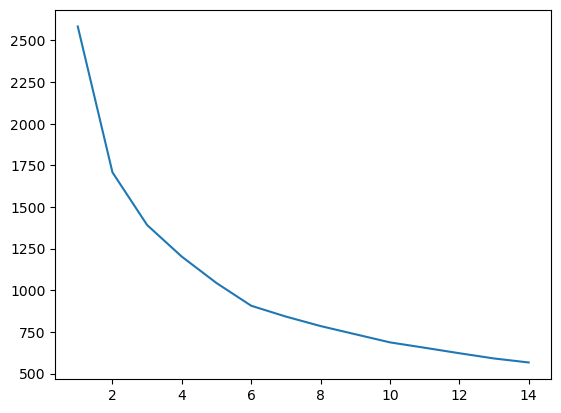

In [49]:
plt.plot(range(1, 15), WSSs)

Con K=3 encontramos aproximadamente el codo. 

### Silueta

Veamos ahora con el método de silueta cuántos clusters deberíamos tener. Obtengamos las siluetas para k = 2, 3, 4 y 5.

Veamos las siluetas de los puntos de cada cluster.
Vamos a crear un bar plot horizontal (barh) para los puntos de cada cluster.

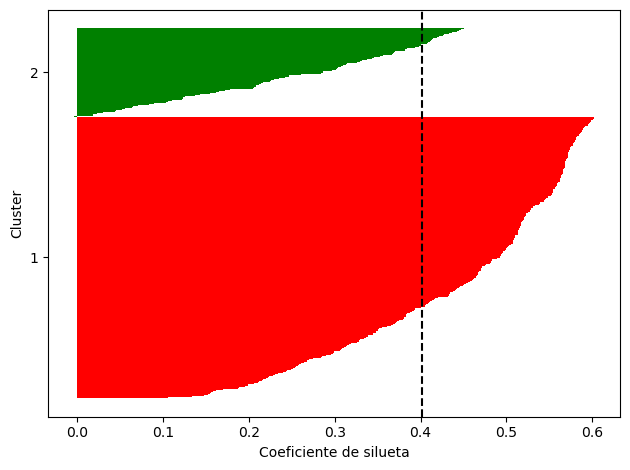

In [50]:
k=2
kmeans = KMeans(n_clusters=k, random_state=0, n_init=10)
kmeans.fit(dataStd)
y_clusters = kmeans.labels_
cluster_labels = np.unique(y_clusters)

silueta_puntos= silhouette_samples(dataStd, y_clusters, metric='euclidean')

y_ax_lower, y_ax_upper = 0, 0
yticks = []
colores = ['r', 'g', 'b', 'y', 'o']
for i, c in enumerate(cluster_labels):
    silueta_puntos_c = silueta_puntos[y_clusters == c]
    silueta_puntos_c.sort()
    y_ax_upper += len(silueta_puntos_c)
    color = colores[i]
    plt.barh(range(y_ax_lower, y_ax_upper), silueta_puntos_c, height=1.0, 
             edgecolor='none', color=color)

    yticks.append((y_ax_lower + y_ax_upper) / 2.)
    y_ax_lower += len(silueta_puntos_c)
    
silueta_promedio = np.mean(silueta_puntos)
plt.axvline(silueta_promedio, color="black", linestyle="--") 

plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Coeficiente de silueta')

plt.tight_layout()
# plt.savefig('./figures/silhouette.png', dpi=300)
plt.show()

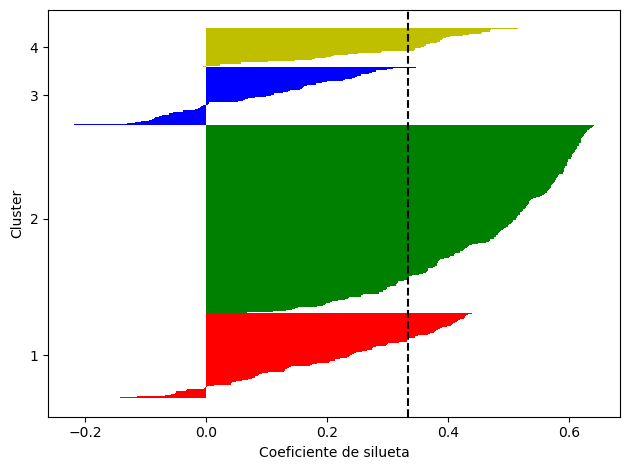

In [51]:
k=4
kmeans = KMeans(n_clusters=k, random_state=0, n_init=10)
kmeans.fit(dataStd)
y_clusters = kmeans.labels_
cluster_labels = np.unique(y_clusters)

silueta_puntos= silhouette_samples(dataStd, y_clusters, metric='euclidean')

y_ax_lower, y_ax_upper = 0, 0
yticks = []
colores = ['r', 'g', 'b', 'y', 'o']
for i, c in enumerate(cluster_labels):
    silueta_puntos_c = silueta_puntos[y_clusters == c]
    silueta_puntos_c.sort()
    y_ax_upper += len(silueta_puntos_c)
    color = colores[i]
    plt.barh(range(y_ax_lower, y_ax_upper), silueta_puntos_c, height=1.0, 
             edgecolor='none', color=color)

    yticks.append((y_ax_lower + y_ax_upper) / 2.)
    y_ax_lower += len(silueta_puntos_c)
    
silueta_promedio = np.mean(silueta_puntos)
plt.axvline(silueta_promedio, color="black", linestyle="--") 

plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Coeficiente de silueta')

plt.tight_layout()
# plt.savefig('./figures/silhouette.png', dpi=300)
plt.show()

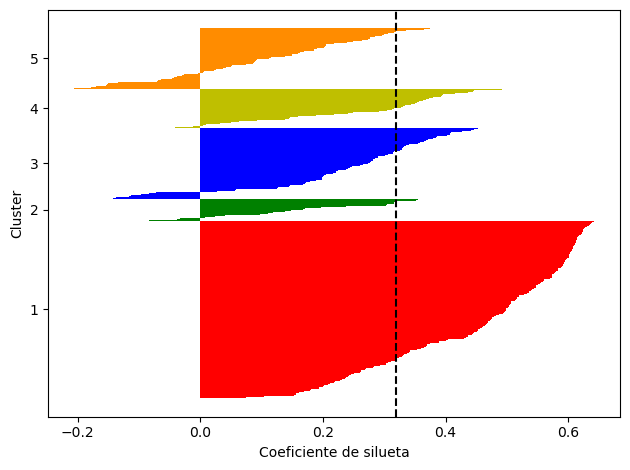

In [52]:
k=5
kmeans = KMeans(n_clusters=k, random_state=0, n_init=10)
kmeans.fit(dataStd)
y_clusters = kmeans.labels_
cluster_labels = np.unique(y_clusters)

silueta_puntos= silhouette_samples(dataStd, y_clusters, metric='euclidean')

y_ax_lower, y_ax_upper = 0, 0
yticks = []
colores = ['red', 'g', 'b', 'y', 'darkorange']
for i, c in enumerate(cluster_labels):
    silueta_puntos_c = silueta_puntos[y_clusters == c]
    silueta_puntos_c.sort()
    y_ax_upper += len(silueta_puntos_c)
    color = colores[i]
    plt.barh(range(y_ax_lower, y_ax_upper), silueta_puntos_c, height=1.0, 
             edgecolor='none', color=color)

    yticks.append((y_ax_lower + y_ax_upper) / 2.)
    y_ax_lower += len(silueta_puntos_c)
    
silueta_promedio = np.mean(silueta_puntos)
plt.axvline(silueta_promedio, color="black", linestyle="--") 

plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Coeficiente de silueta')

plt.tight_layout()
# plt.savefig('./figures/silhouette.png', dpi=300)
plt.show()

Con el método de silueta lo más indicado podría ser solo considerar dos clusters.

## Calinski-Harabaz

Intentemos ahora con la métrica de Calinski-Harabasz

In [54]:
CHs = []
for i in range(2,15) :
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(dataStd)
    CH = calinski_harabasz_score(dataStd, km.labels_) 
    CHs.append(CH)
CHs

[213.28122683153435,
 177.76780227366672,
 158.66175958768085,
 152.40897423571647,
 152.2719397524236,
 141.64727729584416,
 134.15506773095697,
 128.29557092997157,
 125.07941956000478,
 119.82555332137568,
 116.37871300794782,
 113.86588744897203,
 110.63719025231433]

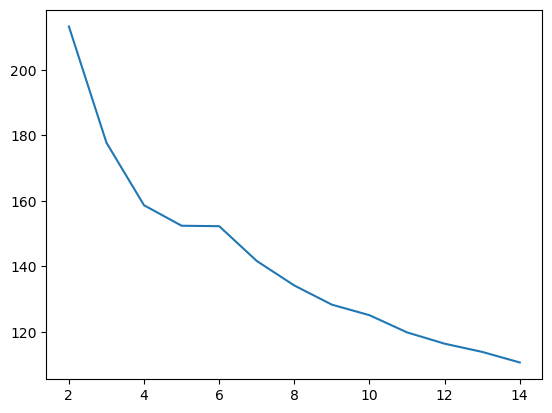

In [55]:
plt.plot(range(2, 15), CHs)

Para este criterio, el mayor score está en K=2, al igual que con el método de silueta. Pero como ya dijimos, no nos convendría mucho un clustering con solo dos segmentos para este caso de aplicación.
Encontramos que entre mas pequeño el K mejor, pero vemos que después de K=6 encontramos una gran desmejoría.

# Parte 5. Reducción de dimensionalidad con PCA

Vamos a buscar una mejor representación de los datos que nos permita conservar la mayor cantidad de información a través de la transformación de las 6 variables originales en componentes principales.

In [56]:
pca = PCA()
pca.fit(dataStd.iloc[:, 0:6])

PCA()

Una vez ajustado el objeto PCA a un dataset, este permite acceder a diferentes aspectos resultantes de la transformación:
- components_: los ejes de los componentes principales en función de las variables originales. Como teníamos 6 variables, vamos a tener 6 PCs, cada uno con las cargas (*loadings*) correspondientes a cada variable original.

In [57]:
pca.components_

array([[-0.17662619,  0.5228338 ,  0.56559339, -0.14203832,  0.55055263,
         0.22862423],
       [ 0.56769933,  0.17469576,  0.01449252,  0.57079691, -0.08413359,
         0.56044738],
       [-0.55360648,  0.06001377,  0.01450733,  0.78884862,  0.05902164,
        -0.25286766],
       [-0.58148941, -0.02840574, -0.22970232, -0.15165733, -0.2613142 ,
         0.71903753],
       [ 0.00539122,  0.8221667 , -0.25741756, -0.09342679, -0.44457039,
        -0.22666638],
       [-0.04337661, -0.12553717,  0.7487701 ,  0.00231556, -0.64838402,
        -0.03598638]])

- explained_variance_: la varianza explicada por cada eje en las unidades originales

In [58]:
pca.explained_variance_

array([2.76398686, 1.37032648, 0.77368869, 0.70151795, 0.29581152,
       0.10905698])

- explained_variance_ratio_: la proporción de la varianza explicada por cada eje, en porcentaje (la suma da 100%).

In [59]:
var_exp=pca.explained_variance_ratio_ # varianza explicada por cada PC
cum_var_exp = np.cumsum(var_exp) # varianza acumulada por los primeros n PCs
var_exp

array([0.45956241, 0.22784136, 0.12863963, 0.11663995, 0.04918397,
       0.01813268])

El objeto PCA sirve además para pasar de la representación en las dimensiones originales a la de las dimensiones en el espacio de los componentes principales encontrados, a partir de su método transform:

In [60]:
dataPca = pca.transform(dataStd.iloc[:, 0:6])

Veamos gráficamente la cantidad de información correspondiente a cada componente principal:

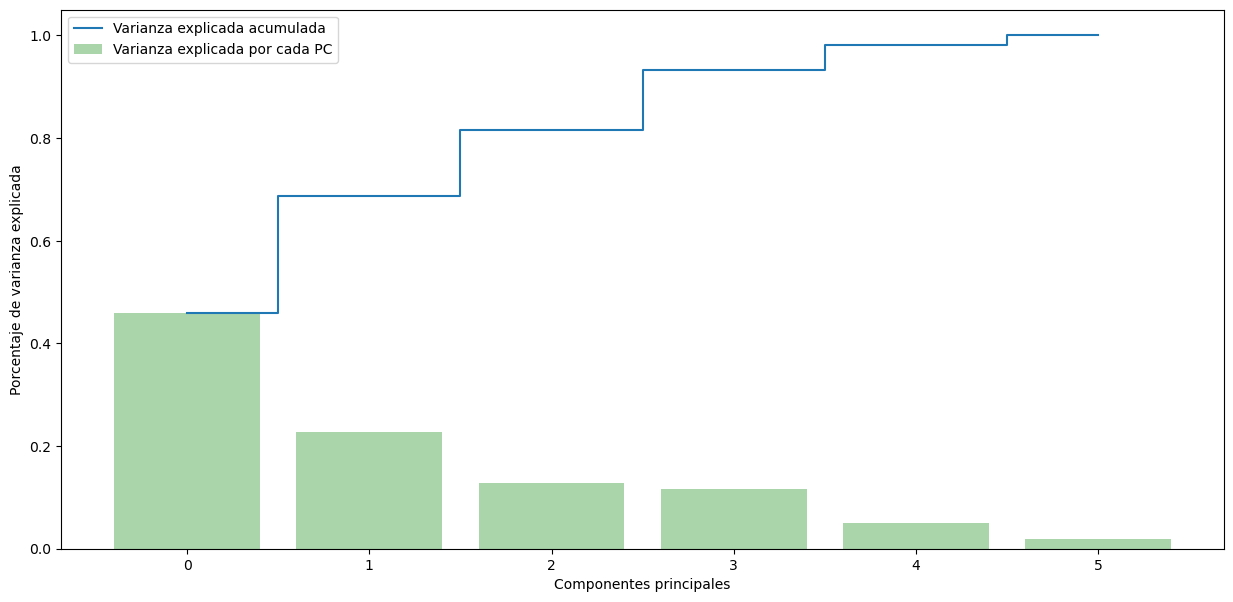

In [61]:
plt.figure(figsize=(15, 7))
plt.bar(range(len(var_exp)), var_exp, alpha=0.3333, align='center', label='Varianza explicada por cada PC', color = 'g')
plt.step(range(len(cum_var_exp)), cum_var_exp, where='mid',label='Varianza explicada acumulada')
plt.ylabel('Porcentaje de varianza explicada')
plt.xlabel('Componentes principales')
plt.legend(loc='best')
plt.show()

In [62]:
np.sum(pca.explained_variance_ratio_[0:3])

0.816043400131198

Encontramos que los primeros 3 componentes conservan el 81.6% de la información original, y los primeros 4 el 93.2%.
Vamos a quedarnos solo con los 3 primeros PCs.

In [63]:
dataPca = dataPca[:,0:3]

In [64]:
dataPca[0:5]

array([[ 0.65616859, -0.14521921, -0.70151548],
       [ 1.04179537,  0.03955682, -0.04681131],
       [-1.08287362,  1.05893268,  0.7024402 ],
       [ 0.41309556,  2.81706414, -1.12899739],
       [ 0.22698998, -0.22216463, -0.45936679]])

Vamos a ver los puntos en el nuevo sistema de representación dado por los componentes principales.
Creamos una función que permite plotear tanto los puntos de los datos como los loadings de las variables originales (tomada de https://stackoverflow.com/questions/39216897/plot-pca-loadings-and-loading-in-biplot-in-sklearn-like-rs-autoplot).
Esto nos permitirá entender mejor la relación entre componentes principales y variables originales.

In [65]:
def biplot(data, loadings, index1, index2, labels=None):
    plt.figure(figsize=(15, 7))
    xs = data[:,index1]
    ys = data[:,index2]
    n=loadings.shape[0]
    scalex = 1.0/(xs.max()- xs.min())
    scaley = 1.0/(ys.max()- ys.min())
    plt.scatter(xs*scalex,ys*scaley)
    for i in range(n):
        plt.arrow(0, 0, loadings[i,index1], loadings[i,index2],color='r',alpha=0.5)
        if labels is None:
            plt.text(loadings[i,index1]* 1.15, loadings[i,index2] * 1.15, "Var"+str(i+1), color='g', ha='center', va='center')
        else:
            plt.text(loadings[i,index1]* 1.15, loadings[i,index2] * 1.15, labels[i], color='g', ha='center', va='center')
    plt.xlim(-1,1)
    plt.ylim(-1,1)
    plt.xlabel("PC{}".format(index1))
    plt.ylabel("PC{}".format(index2))
    plt.grid() 

Veamos como nos va con los primeros dos componentes principales:

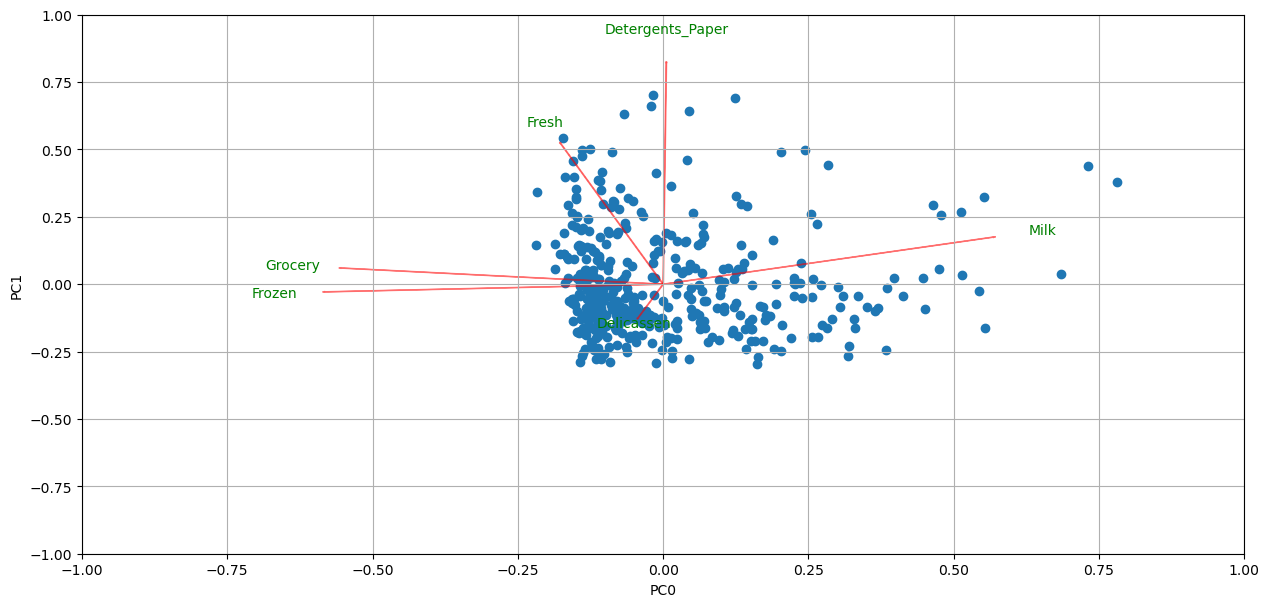

In [66]:
biplot(dataPca, pca.components_, 0, 1, ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen'])

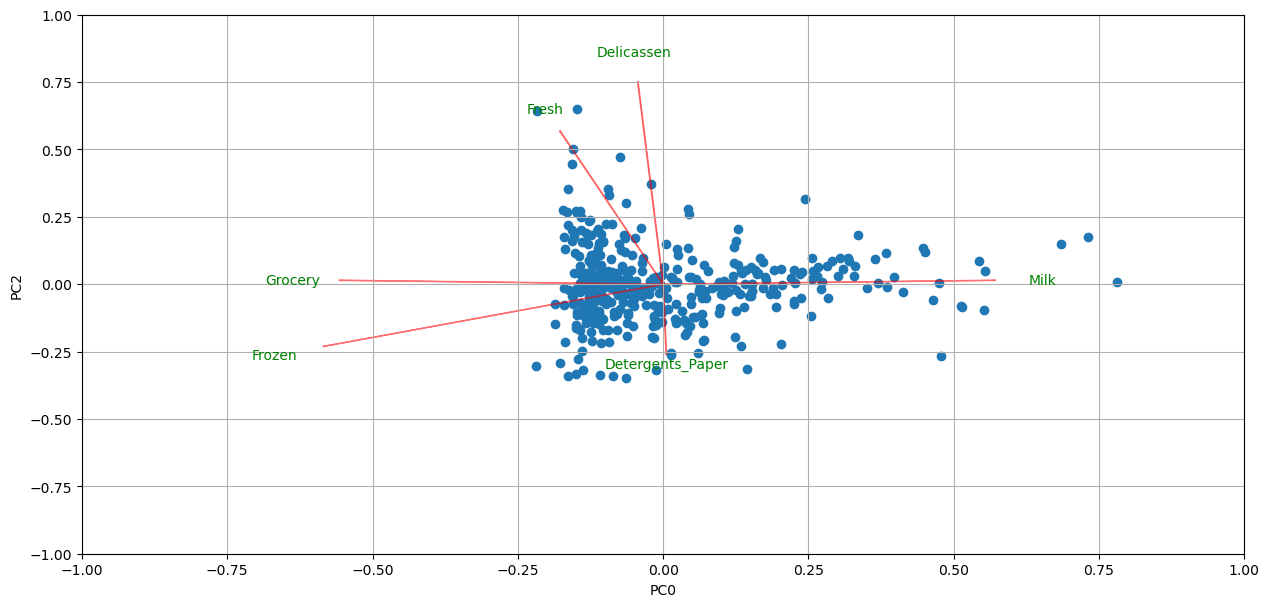

In [67]:
biplot(dataPca, pca.components_, 0, 2, ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen'])

In [68]:
dataStd.columns[0:6]

Index(['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper',
       'Delicatessen'],
      dtype='object')

In [69]:
pca.components_

array([[-0.17662619,  0.5228338 ,  0.56559339, -0.14203832,  0.55055263,
         0.22862423],
       [ 0.56769933,  0.17469576,  0.01449252,  0.57079691, -0.08413359,
         0.56044738],
       [-0.55360648,  0.06001377,  0.01450733,  0.78884862,  0.05902164,
        -0.25286766],
       [-0.58148941, -0.02840574, -0.22970232, -0.15165733, -0.2613142 ,
         0.71903753],
       [ 0.00539122,  0.8221667 , -0.25741756, -0.09342679, -0.44457039,
        -0.22666638],
       [-0.04337661, -0.12553717,  0.7487701 ,  0.00231556, -0.64838402,
        -0.03598638]])

Podemos decir que:
- El componente PC1 representa positivamente las compras de leche en su sentido positivo, y negativamente las compras en Groceries y Frozen. Las otras variables no tienen mayor incidencia.
- El componente PC2 representa sobretodo las compras de Detergentes/Papel y Fresh (positivamente)
- El componente PC3 representa sobretodo las compras de Delicatessen y Fresh (positivamente), y Detergentes/Papel y Frozen (negativamente)

Ahora que ya entendemos el significado de los componentes principales, podemos proseguir a un clustering de los registros en el espacio reducido:

In [70]:
dataPca = pd.DataFrame(dataPca)
dataPca.columns=['PC1', 'PC2', 'PC3']

In [71]:
kmeans = KMeans(n_clusters=3, random_state=0, n_init=10)
kmeans.fit(dataPca)
clusters = kmeans.labels_

In [72]:
dataPca['Cluster']= clusters
counter=Counter(clusters)
print(counter)

Counter({0: 226, 2: 100, 1: 92})


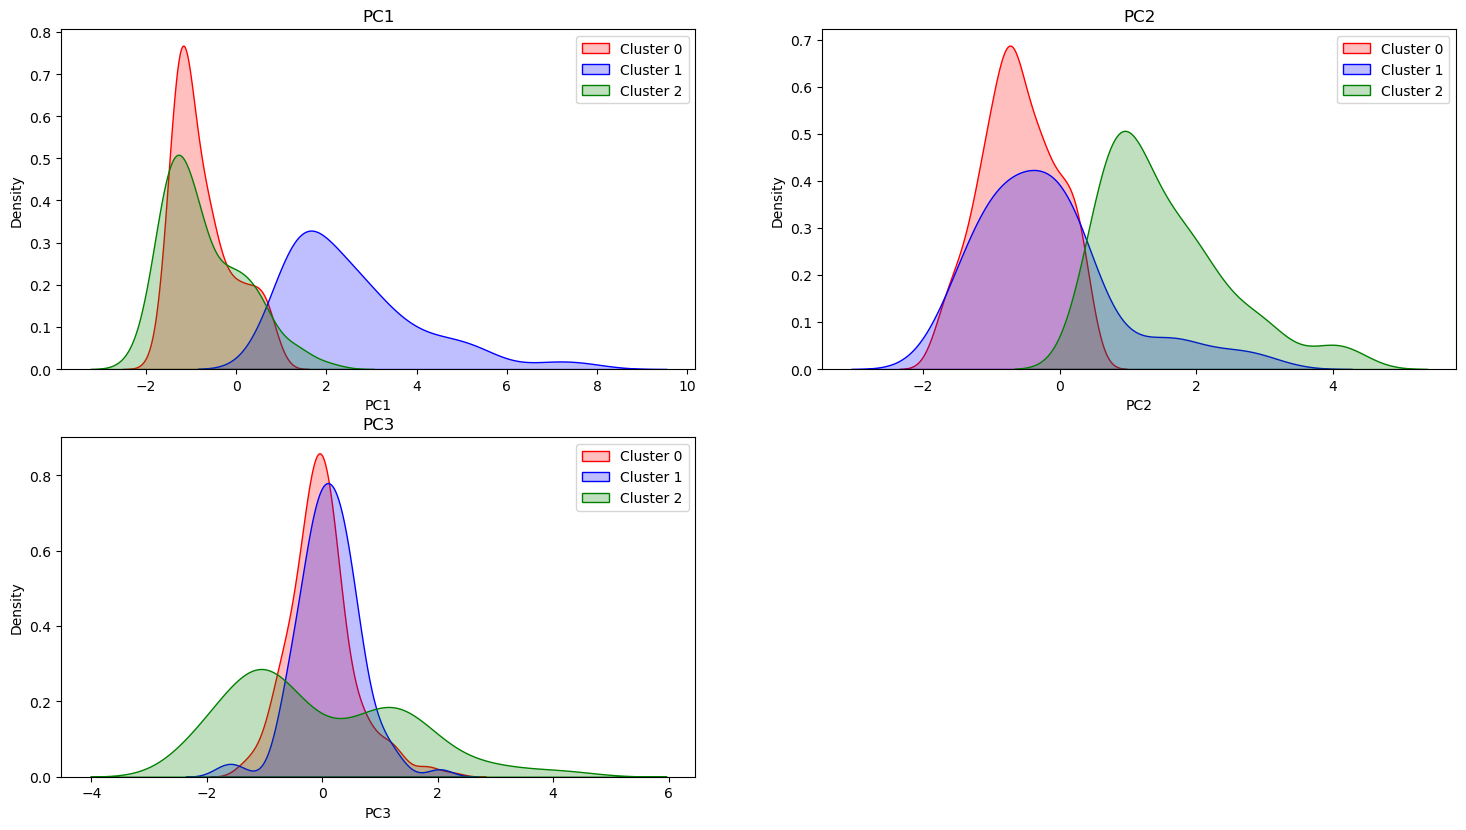

In [73]:
fig = plt.figure(figsize=(18,15))
i=1
for var in dataPca.columns[0:3]:
    ax = fig.add_subplot(math.ceil(len(var_num)/2), 2, i)
    sns.kdeplot(dataPca.loc[dataPca.Cluster==0][var], shade=True, color='r', ax=ax);
    sns.kdeplot(dataPca.loc[dataPca.Cluster==1][var], shade=True, color='b', ax=ax);
    sns.kdeplot(dataPca.loc[dataPca.Cluster==2][var], shade=True, color='g', ax=ax);
    plt.title(var)
    plt.legend(['Cluster 0', 'Cluster 1', 'Cluster 2'])
    i+=1

Vemos que con K=3, El PC1 sirve para separar bien los puntos del cluster rojo (0), el PC2 sirve para distinguir el cluster verde (2). El cluster azul (1) no se puede separar directamente de los demas a través de uno de los PCs, pero si al considerar los 3 PCs.

Veamoslos en scatterplots para entender mejor las diferencias:

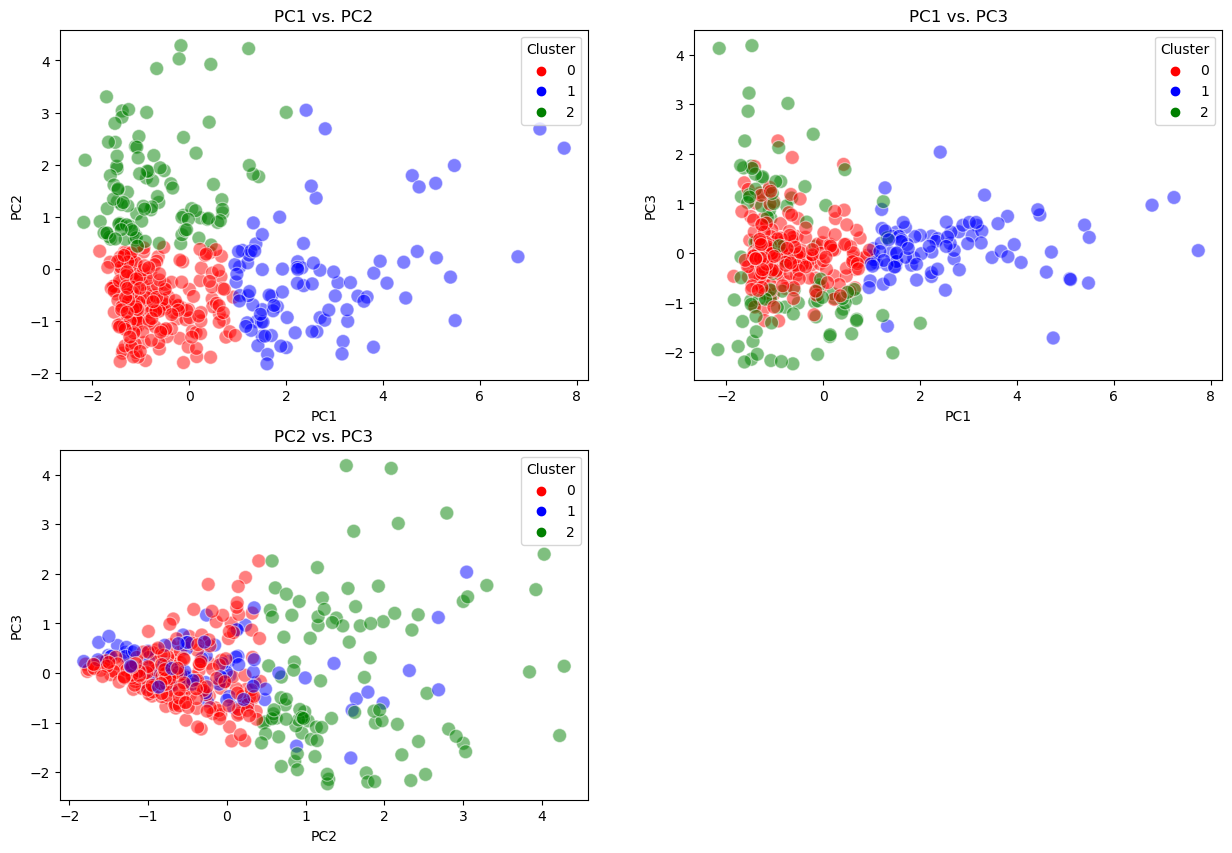

In [74]:
fig = plt.figure(figsize=(15,10))
colorPalette = ["r", "b", "g"]
ax = fig.add_subplot(2, 2, 1)
sns.scatterplot(x="PC1", y="PC2", hue="Cluster", data=dataPca, ax=ax, palette=colorPalette, s=100, alpha=0.5)
plt.title("PC1 vs. PC2")
ax = fig.add_subplot(2, 2, 2)
sns.scatterplot(x="PC1", y="PC3", hue="Cluster", data=dataPca, ax=ax, palette=colorPalette, s=100, alpha=0.5)
plt.title("PC1 vs. PC3")
ax = fig.add_subplot(2, 2, 3)
sns.scatterplot(x="PC2", y="PC3", hue="Cluster", data=dataPca, ax=ax, palette=colorPalette, s=100, alpha=0.5)
plt.title("PC2 vs. PC3")
plt.show()

Vemos que con K=3, en el plot de los 2 primeros PCs podemos separar bien los 3 clusters.
Recordemos que el PC1 representa positivamente las compras de leche en su sentido positivo, y negativamente las compras en Groceries y Frozen, y que el componente PC2 representa sobretodo las compras de Detergentes/Papel y Fresh (positivamente).

**Nota**: Realizar la determinación del número de cluster puede hacerse tanto en el espacio de representación original (ya estandarizado) como en el de los componentes principales (considerandolos todos). Los resultados serán los mismos, ya que tanto el método del codo como el de la silueta se basan en cálculos de distancias, que se conservan después de la transformación en componentes temporales, que no es más que una rotación de los ejes.
